# Web Scraping
O processo com todos os progressos (erros, acertos, dúvidas, frustrações) e minha linha de raciocínio pode ser encontrado no [Web Scraping](https://github.com/pauloreis-ds/Projetos/blob/master/Previs%C3%A3o%20-%20Pre%C3%A7o%20Im%C3%B3veis/notebooks/0%20Im%C3%B3veis%20-%20Processo%20de%20Web%20Scraping%20.ipynb) do [Protótipo](https://github.com/pauloreis-ds/Projetos/tree/master/Previs%C3%A3o%20-%20Pre%C3%A7o%20Im%C3%B3veis) deste projeto. Aqui, basicamente reaproveitei o código final e o adaptei para ter um melhor resultado.

## Agenda
        1 - pe.olx
            1.1 - Código nos dados
            1.2 - Otimizando o código
            1.3 - Criando um arquivo .csv
        2 - redeimoveispe
            2.1 - Investigando as Tags
            2.2 - Copiando e coland-- Otimizando o código
            2.3 - Criando um arquivo .csv
        3 - vivareal
            3.1 - Em busca das Tags
            3.2 - Coletando os dados
            3.3 - .csv

In [1]:
# Pegar os dados da web
import requests
from bs4 import BeautifulSoup

# Criar arquivo csv para uso posterior
import pandas as pd

# 1 - pe.olx

In [4]:
# Criando urls a serem acessadas
urls = []

for url in range(1, 101):
    urls.append("https://pe.olx.com.br/grande-recife/imoveis/venda/apartamentos?o="+ str(url))
    
urls[:5]

['https://pe.olx.com.br/grande-recife/imoveis/venda/apartamentos?o=1',
 'https://pe.olx.com.br/grande-recife/imoveis/venda/apartamentos?o=2',
 'https://pe.olx.com.br/grande-recife/imoveis/venda/apartamentos?o=3',
 'https://pe.olx.com.br/grande-recife/imoveis/venda/apartamentos?o=4',
 'https://pe.olx.com.br/grande-recife/imoveis/venda/apartamentos?o=5']

> Ao inspecionar o código fonte da página é possível saber onde cada dados está localizado. Depois disso só precisamos utilizar os métodos do bs4 para pegá-los.

In [2]:
# Algo como fazer o site saber que somos usuários, ao invés de malware hehe
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}

In [27]:
request = requests.get(urls[0], headers=headers)
soup = BeautifulSoup(request.text, 'html.parser')
request.status_code # 200 = Sucesso!

200

## 1.1 - Código nos dados
Para dar uma de cartomante e prever os preços dos apartamentos de Recife precisamos de informações como:

    Preço do apartamento
    Localização
    Tamanho
    E quantidade de: Quartos
                     Banheiros
                     Vagas para estacionar

Enquanto o preço é o nosso label<br>
Os outros dados serão nossas features. Dados que o modelo de machine learning usará para prever o valor do label.

**Faça funcionar para 1. Depois automatize.**

In [38]:
price = soup.find('div', class_ ='fnmrjs-15 clbSMi')
price.text

'R$ 130.000'

In [42]:
location = soup.find('div', class_ ='fnmrjs-21 bktOWr')
location.p.text

'Jaboatão dos Guararapes, Candeias'

In [43]:
other = soup.find('p', class_ ='jm5s8b-0 jDoirm')
other.text

'2 quartos | 0m² | 1 vaga'

Agora que já sabemos como pegar cada parte necessária, podemos trabalhar para aplicar esse processo em toda a página e, em seguida, nas outras páginas do site.

    ps: ao invés de .find() usamos o find_all() e tratamos all/todas as tags como elementos de uma lista,
    ainda fazendo uso dos métodos do objeto bs4.

In [66]:
request = requests.get(urls[2], headers=headers) # página diferente
soup = BeautifulSoup(request.text, 'html.parser')

price = soup.find_all('div', class_ ='fnmrjs-15 clbSMi')
print(price[0].text)

location = soup.find_all('div', class_ ='fnmrjs-21 bktOWr')
print(location[0].p.text)

others = soup.find_all('p', class_ ='jm5s8b-0 jDoirm')
print(others[0].text)

R$ 530.000
Jaboatão dos Guararapes, Piedade
3 quartos | 110m² | Condomínio: R$ 600 | 2 vagas


## 1.2 - Otimizando o código
(passando por todas as páginas) Para completar o primeiro web scraping e obter as features que usaremos no modelo de machine learning.

In [220]:
# Algo como fazer o site saber que somos usuários, ao invés de malware hehe
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}

In [108]:
# Para armazenar os elementos pegos
prices_list = []
locations_list = []
other_information = []

for url in urls:
    # Requerimentos para ter acesso ao conteúdo do site
    request = requests.get(url, headers=headers)

    # Nossa forma orientada a objeto de interagir com tal conteúdo 
    soup = BeautifulSoup(request.text, 'html.parser')

    # Acessando as tags que contêm os dados 
    prices = soup.find_all('div', class_ ='fnmrjs-15 clbSMi')
    locations = soup.find_all('div', class_ ='fnmrjs-21 bktOWr')
    others = soup.find_all('p', class_ ='jm5s8b-0 jDoirm')

    # Salvando os dados contidos nas tags nas listas
    for item in range(len(prices)):
        try:
            prices_list.append(prices[item].text)
            locations_list.append(locations[item].p.text)
            other_information.append(others[item].text)
        except: 
            prices_list[item] = None
            locations_list[item] = None
            other_information[item] = None
        
print("Processo Finalizado!")
print(len(prices_list), len(locations_list), len(other_information))

Processo Finalizado!
4922 4922 4919


## 1.3 - Criando um arquivo .csv
O pandas nos ajudará com essa tarefa

Observe que na coluna ['other'] não há número de banheiros (-.- ' ). O motivo é que o site apenas disponibiliza essa informação ao entrar na descrição do imóvel -.- Por hora vamos ignorar isso, talvez consigamos contornar isso no futuro.

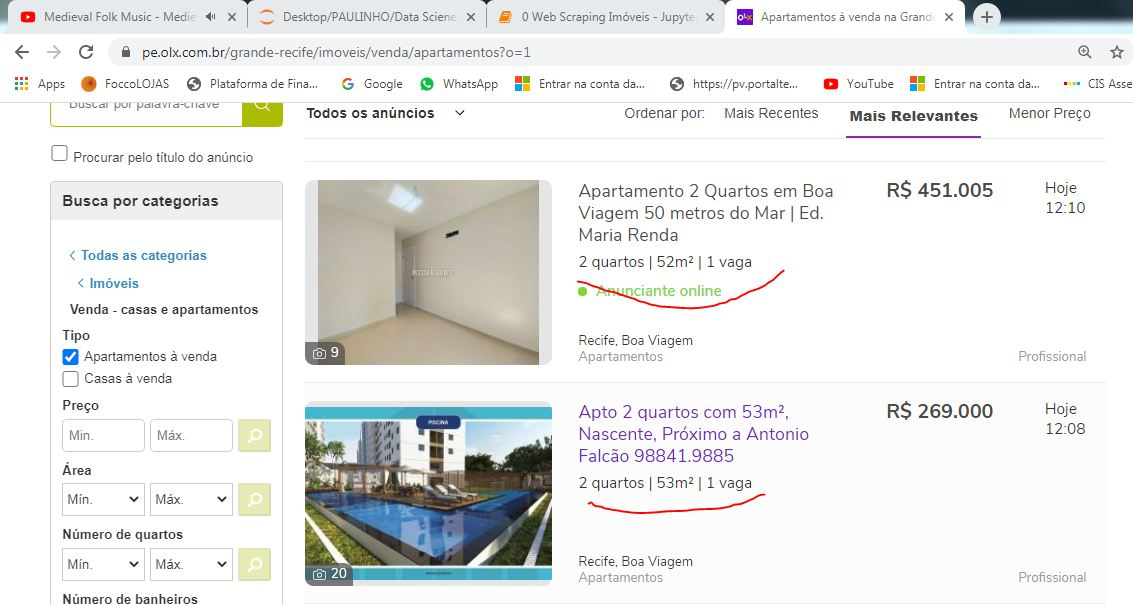

In [151]:
from IPython.display import Image
Image(filename='pe olx site.JPG')

In [131]:
df = pd.DataFrame(list(zip(prices_list, locations_list, other_information)), 
               columns =['prices', 'locations', 'other']) 
df.head()

,prices,locations,other
0,R$ 750.000,"Recife, Boa Viagem",3 quartos | 130m² | 1 vaga
1,R$ 200.000,"Jaboatão dos Guararapes, Candeias",2 quartos | 61m² | 1 vaga
2,R$ 300.000,"Recife, Cordeiro",2 quartos | 50m² | Condomínio: R$ 1 | 1 vaga
3,R$ 128.000,"Paulista, Nossa Senhora do Ó",2 quartos | 63m² | 1 vaga
4,R$ 125.000,"Recife, Areias",2 quartos | 62m² | Condomínio: R$ 140 | 1 vaga


In [153]:
print(df.shape)
df.to_csv('0 - Apartamentos Dados (Bruto).csv')

(4919, 3)


# 2 - redeimoveispe
Aplicaremos os mesmos fundamentos para coletar dados de outros site.

In [5]:
# Criando urls a serem acessadas
urls = []

for url in range(1, 104):
    urls.append("https://www.redeimoveispe.com.br/imoveis/a-venda/apartamento/recife?pagina="+ str(url))
    
urls[-5:]

['https://www.redeimoveispe.com.br/imoveis/a-venda/apartamento/recife?pagina=99',
 'https://www.redeimoveispe.com.br/imoveis/a-venda/apartamento/recife?pagina=100',
 'https://www.redeimoveispe.com.br/imoveis/a-venda/apartamento/recife?pagina=101',
 'https://www.redeimoveispe.com.br/imoveis/a-venda/apartamento/recife?pagina=102',
 'https://www.redeimoveispe.com.br/imoveis/a-venda/apartamento/recife?pagina=103']

## 2.1 - Investigando Tags

Dessa vez a captura das informações "others" troux um gosto diferente. Anteriormente sabemos da presença dos '|', o que será nosso parâmetro de separação dos dados. Mas aqui temos todas as informações juntas. Talvez dê um pouco mais de trabalho para tratar.

**Faça funcionar para 1.**


In [6]:
request = requests.get(urls[1], headers=headers) 
soup = BeautifulSoup(request.text, 'html.parser')

price = soup.find('div', class_ ='info-left')
print(price.text)

location = soup.find('div', class_ ='card-block')
print(location.h2.text)

others = soup.find('div', class_ ='values')
print(others.text)

R$ 160.000
Cordeiro
2quartos2banheiros1vaga64m²


**Depois automatize.**

In [202]:
price = soup.find_all('div', class_ ='info-left')
print(price[1].text)

location = soup.find_all('div', class_ ='card-block')
print(location[1].h2.text)

others = soup.find_all('div', class_ ='values')
print(others[1].text)

R$ 160.000
Cordeiro
2quartos2banheiros1vaga64m²


## 2.2 - Copiando e coland-- Otimizando o código
Parando para pensar, acho que poderia criar uma função para isso... Bom já estou aqui então não me darei ao trabalho. Mas caso fosse fazer isso repetidamente, uma função reduziria o tempo de coleta.

In [14]:
# Para armazenar os elementos pegos
prices_list = []
locations_list = []
other_information = []

for url in urls:
    # Requerimentos para ter acesso ao conteúdo do site
    request = requests.get(url, headers=headers)

    # Nossa forma orientada a objeto de interagir com tal conteúdo 
    soup = BeautifulSoup(request.text, 'html.parser')

    # Acessando as tags que contêm os dados 
    prices = soup.find_all('div', class_ ='info-left')
    locations = soup.find_all('div', class_ ='card-block')
    others = soup.find_all('div', class_ ='values')

    # Salvando os dados contidos nas tags nas listas
    for item in range(len(prices)):
        try:
            prices_list.append(prices[item].text)
            locations_list.append(locations[item].h2.text)
            other_information.append(others[item].text)
        except: 
            prices_list[item] = None
            locations_list[item] = None
            other_information[item] = None
        
print("Processo Finalizado!")
print(len(prices_list), len(locations_list), len(other_information))

Processo Finalizado!
1236 1236 1236


## 2.3 - Criando um arquivo .csv

In [15]:
# Bem menos dados 

df = pd.DataFrame(list(zip(prices_list, locations_list, other_information)), 
               columns =['prices', 'locations', 'other']) 
df.head()

,prices,locations,other
0,R$ 80.000,Campo Grande,2quartos2banheiros1vaga67m²
1,R$ 130.000,Boa Vista,"1quarto1banheiro 58,40m²"
2,R$ 130.000,Linha do Tiro,2quartos1banheiro 1vaga65m²
3,R$ 132.000R$ 630/ano,Várzea,2quartos1banheiro 1vaga50m²
4,R$ 140.000,Tejipió,2quartos1banheiro 80vagas41m²


In [16]:
df.to_csv('0.1 - Apartamentos Dados (Bruto).csv')

# 3 - vivareal

In [287]:
# Criando urls a serem acessadas
urls = []

for url in range(1, 300):
    urls.append(f"https://www.vivareal.com.br/venda/pernambuco/recife/apartamento_residencial/?__vt=gv:a&pagina={str(url)}#onde=BR-Pernambuco-NULL-Recife&tipos=apartamento_residencial")
    
urls[:2]

['https://www.vivareal.com.br/venda/pernambuco/recife/apartamento_residencial/?__vt=gv:a&pagina=1#onde=BR-Pernambuco-NULL-Recife&tipos=apartamento_residencial',
 'https://www.vivareal.com.br/venda/pernambuco/recife/apartamento_residencial/?__vt=gv:a&pagina=2#onde=BR-Pernambuco-NULL-Recife&tipos=apartamento_residencial']

## 3.1 - Em busca das Tags

In [270]:
request = requests.get(urls[0], headers=headers) 
soup = BeautifulSoup(request.text, 'html.parser')

# Encontre 1
price = soup.find('div', class_ ='property-card__price')
print(price.text)

location = soup.find('span', class_ ='property-card__address')
print(location.text)

others = soup.find('ul', class_ ='property-card__details')
print(others.text)

      R$ 1.700.000    
 Avenida Dezessete de Agosto, 2720 - Casa Forte, Recife - PE 
   207   Área m²     4   Quartos     4   Suítes     5   Banheiros     3   Vagas   


In [272]:
# Automatize para todos
price = soup.find_all('div', class_ ='property-card__price')
print(price[1].text)

location = soup.find_all('span', class_ ='property-card__address')
print(location[1].text)

others = soup.find_all('ul', class_ ='property-card__details')
print(others[1].text)

    Sob Consulta   
 Rua Eurico de Souza Leão, 541 - Cordeiro, Recife - PE 
   55-73   Área m²     1-3   Quartos     1   Banheiro     1-2   Vagas   


## 3.2 - Coletando os dados

In [288]:
# Para armazenar os elementos pegos
prices_list = []
locations_list = []
other_information = []

for url in urls:
    # Requerimentos para ter acesso ao conteúdo do site
    request = requests.get(url, headers=headers)

    # Nossa forma orientada a objeto de interagir com tal conteúdo 
    soup = BeautifulSoup(request.text, 'html.parser')

    # Acessando as tags que contêm os dados 
    prices = soup.find_all('div', class_ ='property-card__price')
    locations = soup.find_all('span', class_ ='property-card__address')
    others = soup.find_all('ul', class_ ='property-card__details')

    # Salvando os dados contidos nas tags nas listas
    for item in range(len(prices)):
        try:
            prices_list.append(prices[item].text)
            locations_list.append(locations[item].text)
            other_information.append(others[item].text)
        except: 
            prices_list[item] = "None"
            locations_list[item] = "None"
            other_information[item] = "None"
        
print("Processo Finalizado!")
print(len(prices_list), len(locations_list), len(other_information))

Processo Finalizado!
10764 10764 10764


## 3.3 - .csv

In [290]:
df = pd.DataFrame(list(zip(prices_list, locations_list, other_information)), 
               columns =['prices', 'locations', 'other']) 
df.head()

,prices,locations,other
0,R$ 1.700.000,"Avenida Dezessete de Agosto, 2720 - Casa Fort...",207 Área m² 4 Quartos 4 Suíte...
1,Sob Consulta,"Rua Eurico de Souza Leão, 541 - Cordeiro, Rec...",55-73 Área m² 1-3 Quartos 1 B...
2,R$ 780.000,"Rua Wilfrid Rússel Shorto, 61 - Boa Viagem, R...",250 Área m² 4 Quartos 2 Suíte...
3,R$ 450.000,"Estrada do Encanamento, 1342 - Casa Forte, Re...",82 Área m² 3 Quartos 1 Suíte ...
4,R$ 350.000,"Rua Doutor Luiz Inácio Pessoa de Melo, 81 - B...",70 Área m² 2 Quartos 1 Suíte ...


In [291]:
df.to_csv('0.2 - Apartamentos Dados (Bruto).csv')

Finalizada a coleta de dados, podemos partir para uma **Análise Exploratória**. Com o intuito de entender a estrutura dos dados e saber como (de acordo com nosso objetivo) manipulá-los.